In [1]:
import numpy as np
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared
import matplotlib.pyplot as plt

%matplotlib inline

Define a synthetic function that we want to fit. We'll later add a bit of noise to it.

In [2]:
def f(x):
    # return 1.0 + x/2.0 + np.sin(x)
    return x*np.sin(x)

In [3]:
X = np.atleast_2d(np.linspace(0, 10, 100)).T
y = f(X).ravel()

dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)

# y += 0.2*noise

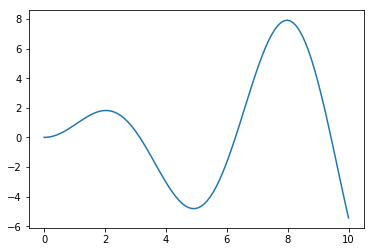

In [4]:
plt.plot(X, y)

In [5]:
# gp_kernel = ExpSineSquared(1, 10.0) + WhiteKernel(1e-1)
# gp = gaussian_process.GaussianProcessRegressor(kernel=gp_kernel, normalize_y=True)
gp = gaussian_process.GaussianProcessRegressor()

In [6]:
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [7]:
x = np.atleast_2d(np.linspace(0, 14, 1000)).T

In [8]:
y_pred, y_std = gp.predict(x, return_std=True)
y_std = y_std*2

/Users/harish/Desktop/uk-property-prices/housing-data/venv/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [9]:
x_ = np.atleast_2d(np.linspace(0, 14, 1000)).T
y_ = f(x_).ravel()

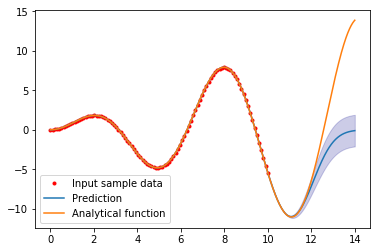

In [10]:
plt.plot(X, y, 'r.', label='Input sample data')
plt.plot(x, y_pred, label='Prediction +/- 2std')
plt.plot(x_, y_, label='Analytical function')
plt.fill_between(x[:, 0], y_pred - y_std, y_pred + y_std, color='darkblue', alpha=0.2)
plt.legend(loc='lower left')
plt.show()